Data shape: (814, 13)

Columns: ['Unnamed: 0', 'attitude.roll', 'attitude.pitch', 'attitude.yaw', 'gravity.x', 'gravity.y', 'gravity.z', 'rotationRate.x', 'rotationRate.y', 'rotationRate.z', 'userAcceleration.x', 'userAcceleration.y', 'userAcceleration.z']

First 5 rows:


,Unnamed: 0,attitude.roll,attitude.pitch,attitude.yaw,gravity.x,gravity.y,gravity.z,rotationRate.x,rotationRate.y,rotationRate.z,userAcceleration.x,userAcceleration.y,userAcceleration.z
0,0,-2.116381,-1.077507,-2.261502,-0.404768,0.880780,0.245713,-1.264215,-1.027909,-0.947909,0.282683,-0.254346,-0.407670
1,1,-2.148154,-1.049759,-2.284278,-0.417081,0.867303,0.271686,-1.162024,-0.269118,-0.848823,0.256712,0.079154,-0.560291
2,2,-2.153824,-1.026749,-2.297008,-0.432082,0.855621,0.284961,-0.665042,0.520170,-0.726722,0.253600,0.346680,-0.463275
3,3,-2.142509,-1.012749,-2.290595,-0.445311,0.848291,0.286507,-0.079809,0.055322,-0.604534,0.411818,0.459372,-0.510293
4,4,-2.130486,-1.007262,-2.274149,-0.452661,0.845372,0.283600,0.456097,-0.186877,-0.441315,0.311594,0.477305,-0.925049



Descriptive statistics:


,Unnamed: 0,attitude.roll,attitude.pitch,attitude.yaw,gravity.x,gravity.y,gravity.z,rotationRate.x,rotationRate.y,rotationRate.z,userAcceleration.x,userAcceleration.y,userAcceleration.z
count,814.000000,814.000000,814.000000,814.000000,814.000000,814.000000,814.000000,814.000000,814.000000,814.000000,814.000000,814.000000,814.000000
mean,406.500000,-0.910195,-1.229309,0.359313,-0.206416,0.937575,-0.170166,0.159181,-0.559058,0.087849,0.011355,0.076549,0.071171
std,235.125853,0.622754,0.100076,1.797364,0.104029,0.035546,0.193258,1.610968,1.735984,0.780132,0.330635,0.741402,0.611101
min,0.000000,-2.546843,-1.440797,-3.111817,-0.480590,0.828688,-0.559421,-4.413757,-15.205497,-2.699976,-1.533204,-1.593355,-3.330222
25%,203.250000,-1.253973,-1.308487,-1.676251,-0.277081,0.915983,-0.296287,-1.040231,-1.630846,-0.454668,-0.179762,-0.333438,-0.278178
50%,406.500000,-0.710071,-1.242519,1.395815,-0.196493,0.946600,-0.192765,-0.090869,-0.435373,0.062507,0.024044,0.037742,0.103491
75%,609.750000,-0.452712,-1.157952,1.874325,-0.124427,0.965794,-0.089443,1.187219,0.692846,0.640532,0.225189,0.393751,0.490812
max,813.000000,0.081449,-0.976759,3.098722,0.040498,0.991562,0.394173,4.377764,4.967046,2.267658,1.095221,5.057225,1.814400


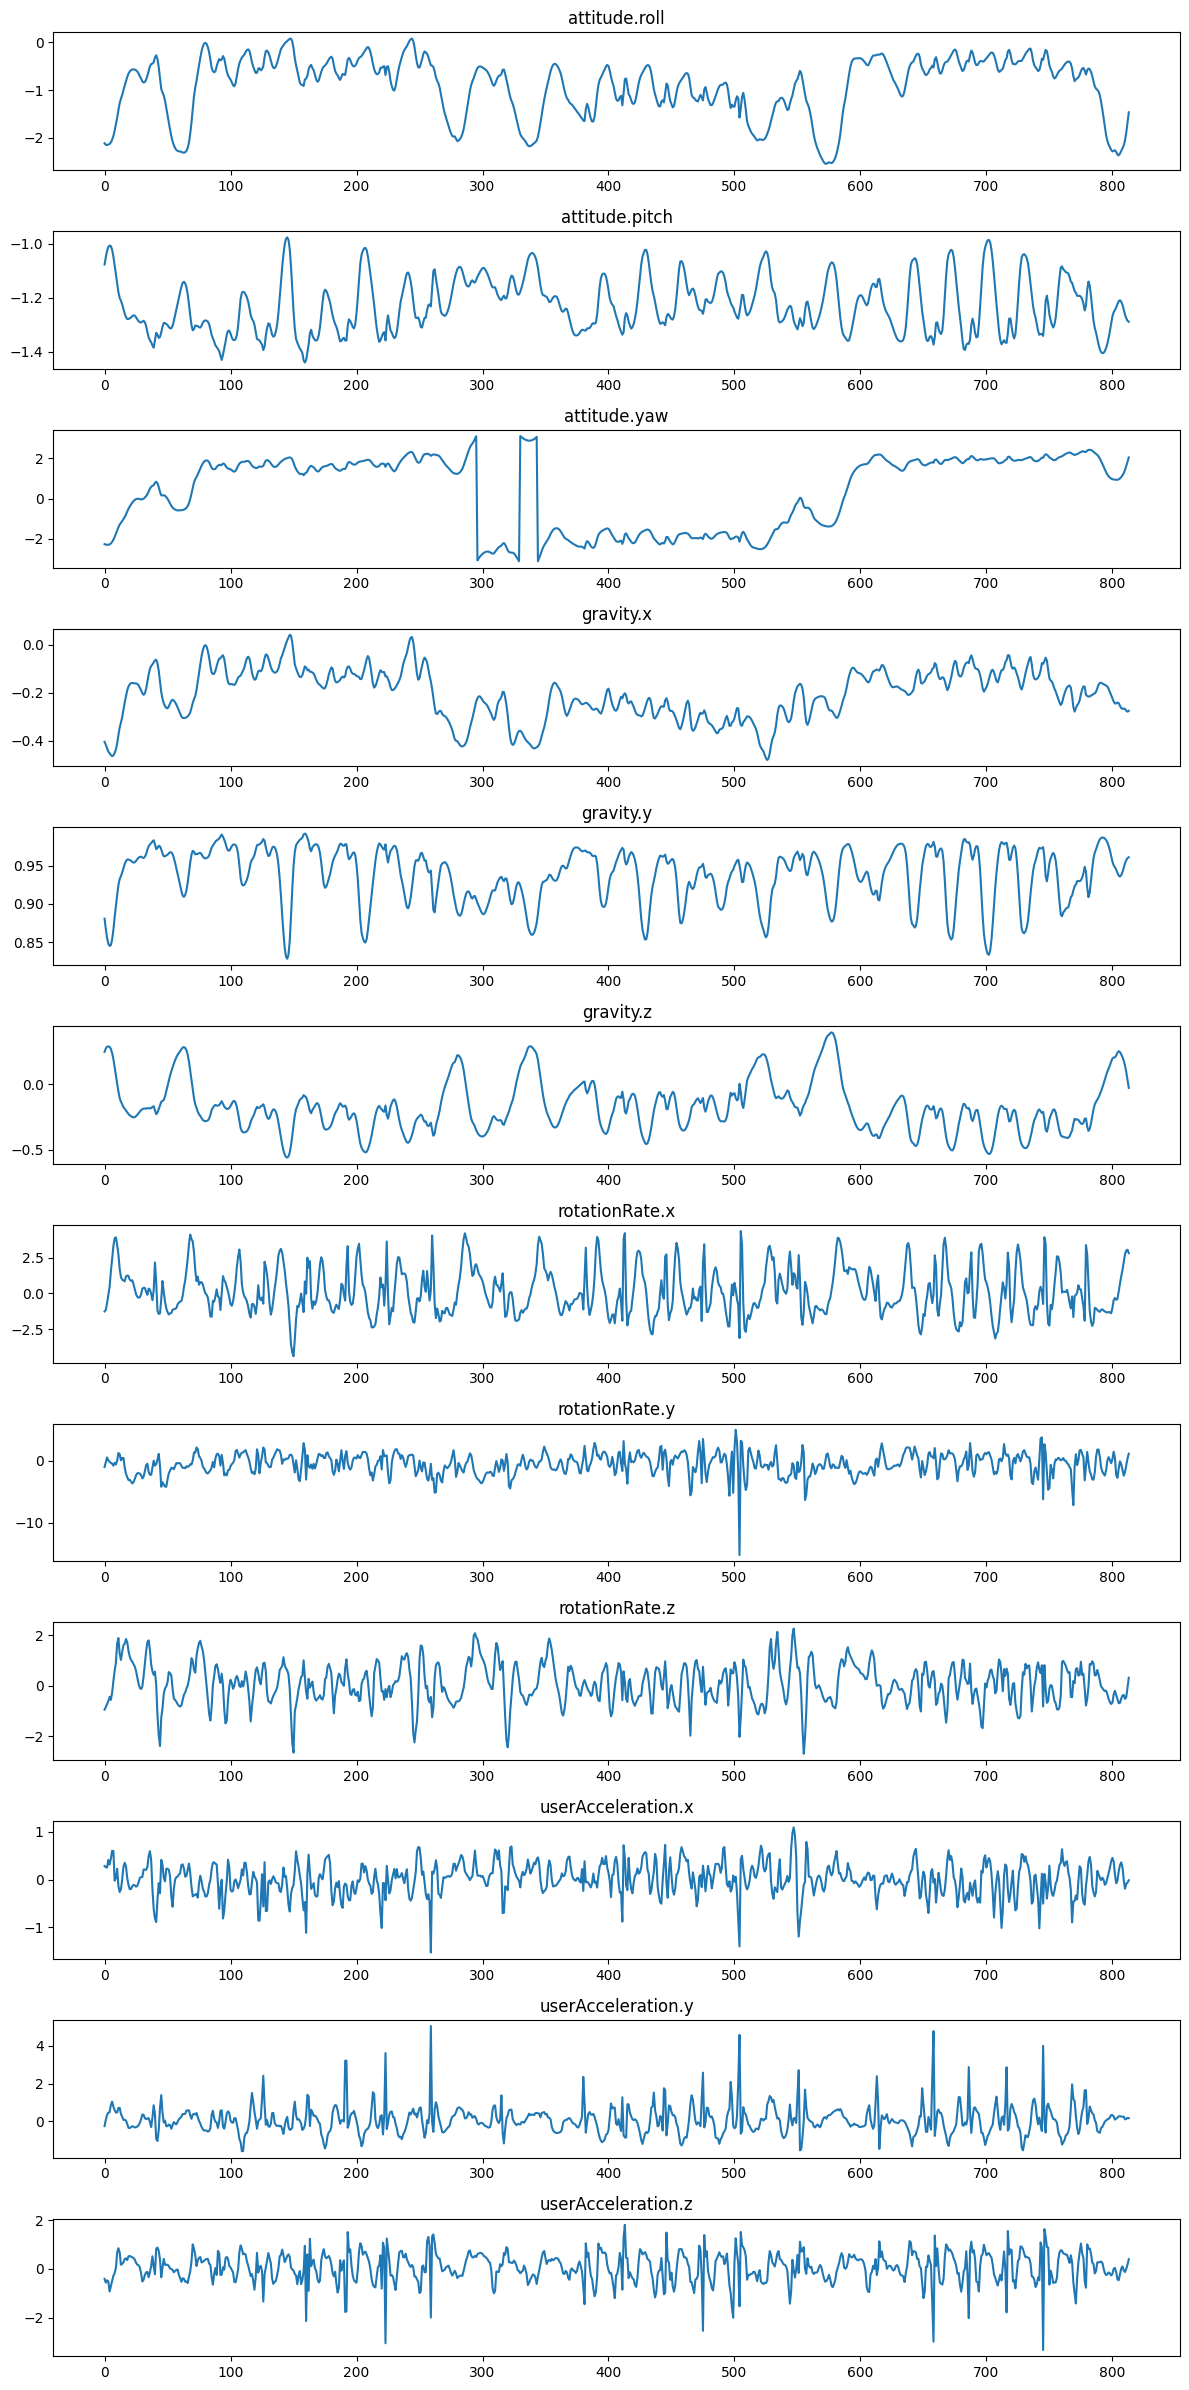

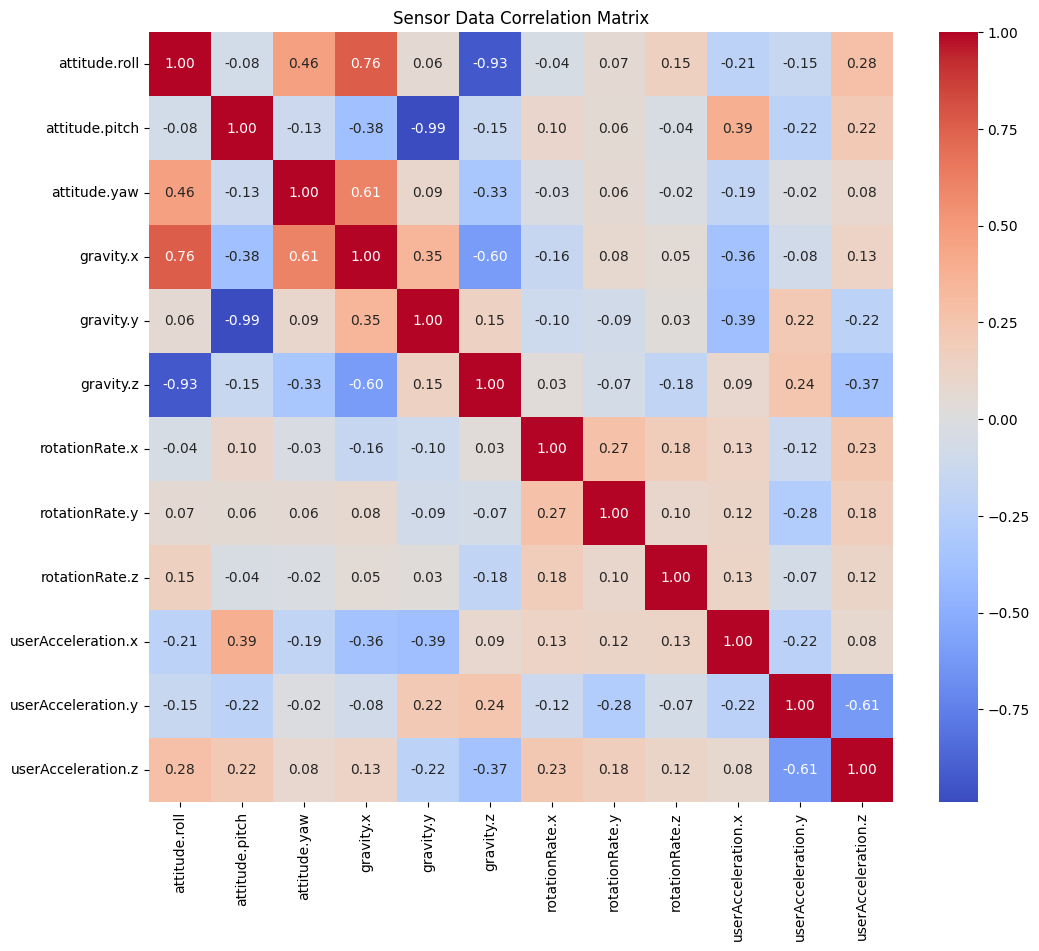

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from pathlib import Path

# Load data
data_path = Path('../data/A_DeviceMotion_data/')
csv_files = list(data_path.glob('*/*.csv'))

# Load first file to explore
df = pd.read_csv(csv_files[0])
print(f"Data shape: {df.shape}")
print("\nColumns:", df.columns.tolist())
print("\nFirst 5 rows:")
display(df.head())

# Basic statistics
print("\nDescriptive statistics:")
display(df.describe())

# Activity distribution
if 'activity' in df.columns:
    plt.figure(figsize=(10, 5))
    sns.countplot(data=df, x='activity')
    plt.title('Activity Distribution')
    plt.xticks(rotation=45)
    plt.show()

# Time series visualization
sensor_cols = [col for col in df.columns if 'attitude' in col or 'gravity' in col or 'rotationRate' in col or 'userAcceleration' in col]
if sensor_cols:
    fig, axes = plt.subplots(len(sensor_cols), 1, figsize=(12, 2*len(sensor_cols)))
    for ax, col in zip(axes, sensor_cols):
        ax.plot(df[col])
        ax.set_title(col)
    plt.tight_layout()
    plt.show()

# Correlation matrix
plt.figure(figsize=(12, 10))
corr = df[sensor_cols].corr()
sns.heatmap(corr, annot=True, fmt='.2f', cmap='coolwarm')
plt.title('Sensor Data Correlation Matrix')
plt.show()